## 문제 1. 
- 기존 시각화를 16개 그래프를 4 x 4 형태로 변형해서 시각화를 그리세요

In [1]:
import gdown

gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)

Downloading...
From: https://bit.ly/3pK7iuu
To: C:\Users\user\Desktop\han-toss\test\ns_book7.csv
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 53.8M/53.8M [00:53<00:00, 1.00MB/s]


'ns_book7.csv'

In [2]:
import pandas as pd

ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
top30_pubs = ns_book7['출판사'].value_counts()[:30]
top30_pubs_idx = ns_book7['출판사'].isin(top30_pubs.index)
ns_book9 = ns_book7[top30_pubs_idx][['출판사', '발행년도', '대출건수']]
ns_book9 = ns_book9.groupby(by=['출판사', '발행년도']).sum()
ns_book9 = ns_book9.reset_index()

C:\Users\user\AppData\Local\Temp\ipykernel_4260\3456287838.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


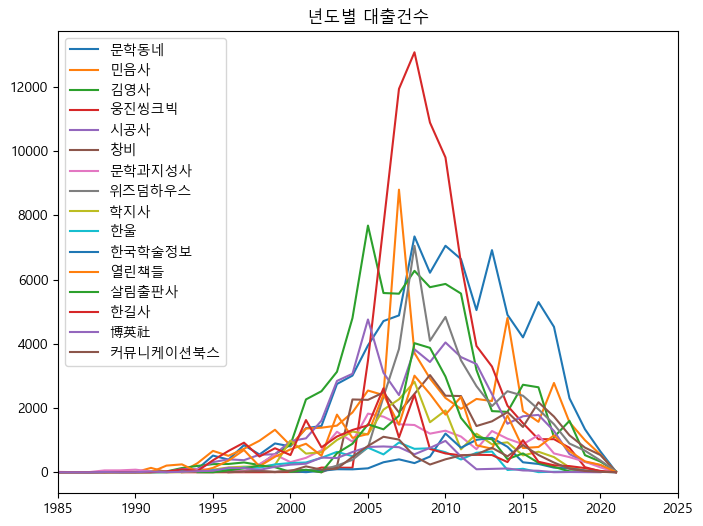

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.rcParams['font.family'] = 'Malgun Gothic' # 옵션 설정

fig, ax = plt.subplots(figsize=(8, 6))
for pub in top30_pubs.index[:16]:
    line = ns_book9[ns_book9['출판사'] == pub]
    ax.plot(line['발행년도'], line['대출건수'], label=pub)
ax.set_title('년도별 대출건수')
ax.legend()
ax.set_xlim(1985, 2025)
plt.show()

- if-else 조건 사용

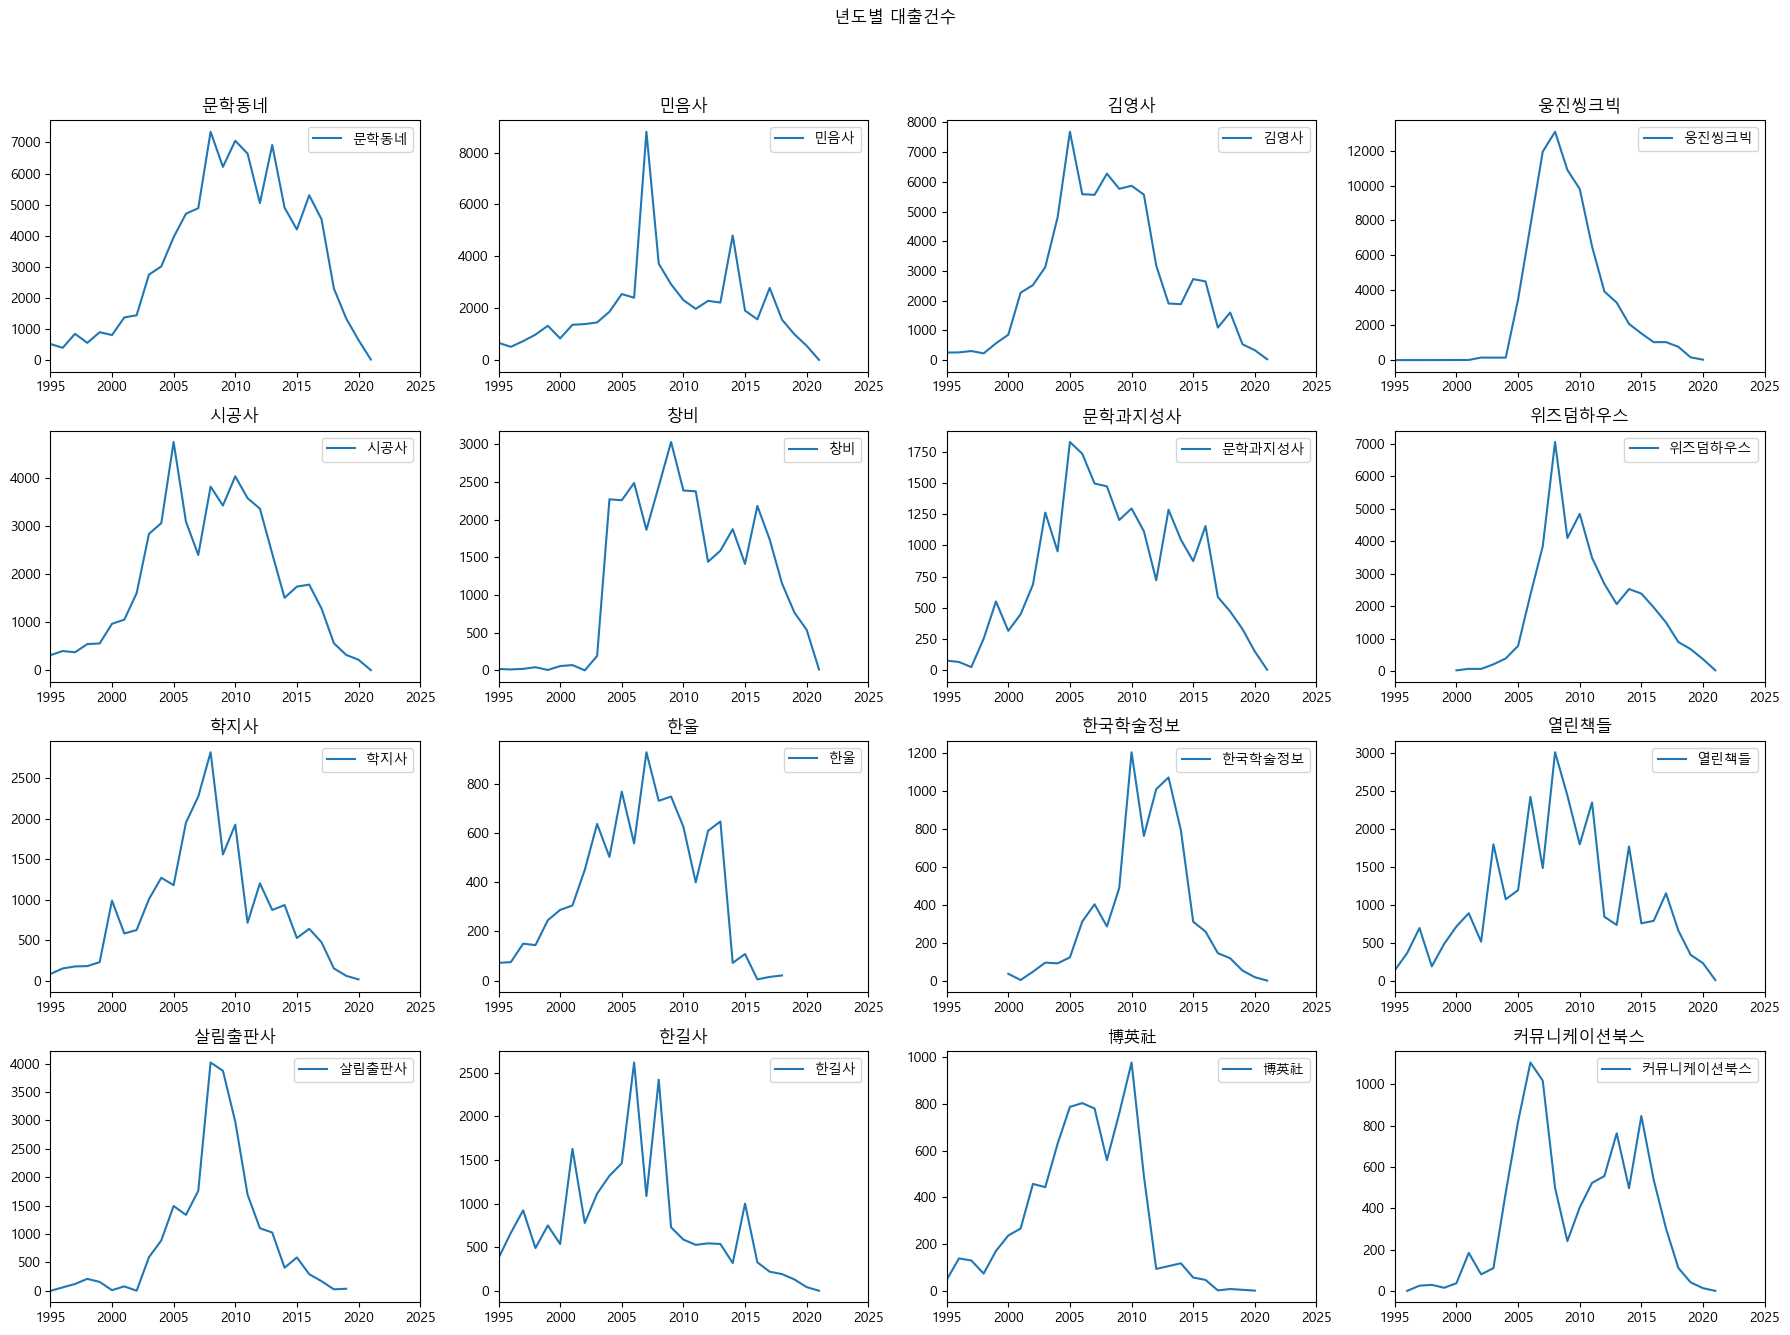

In [56]:
fig, ax = plt.subplots(4, 4, figsize=(18, 14))

for i, pub in enumerate(top30_pubs.index[:16]):
    line = ns_book9[ns_book9['출판사'] == pub]
    row = i // 4  # 행 번호 계산
    col = i % 4   # 열 번호 계산
    ax[row, col].plot(line['발행년도'], line['대출건수'], label=pub)
    ax[row, col].set_title(f'{pub}')
    ax[row, col].set_xlim([1995, 2025])
    ax[row, col].legend() 

    

fig.suptitle('년도별 대출건수') 
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- 좀 더 간결하게 해보자

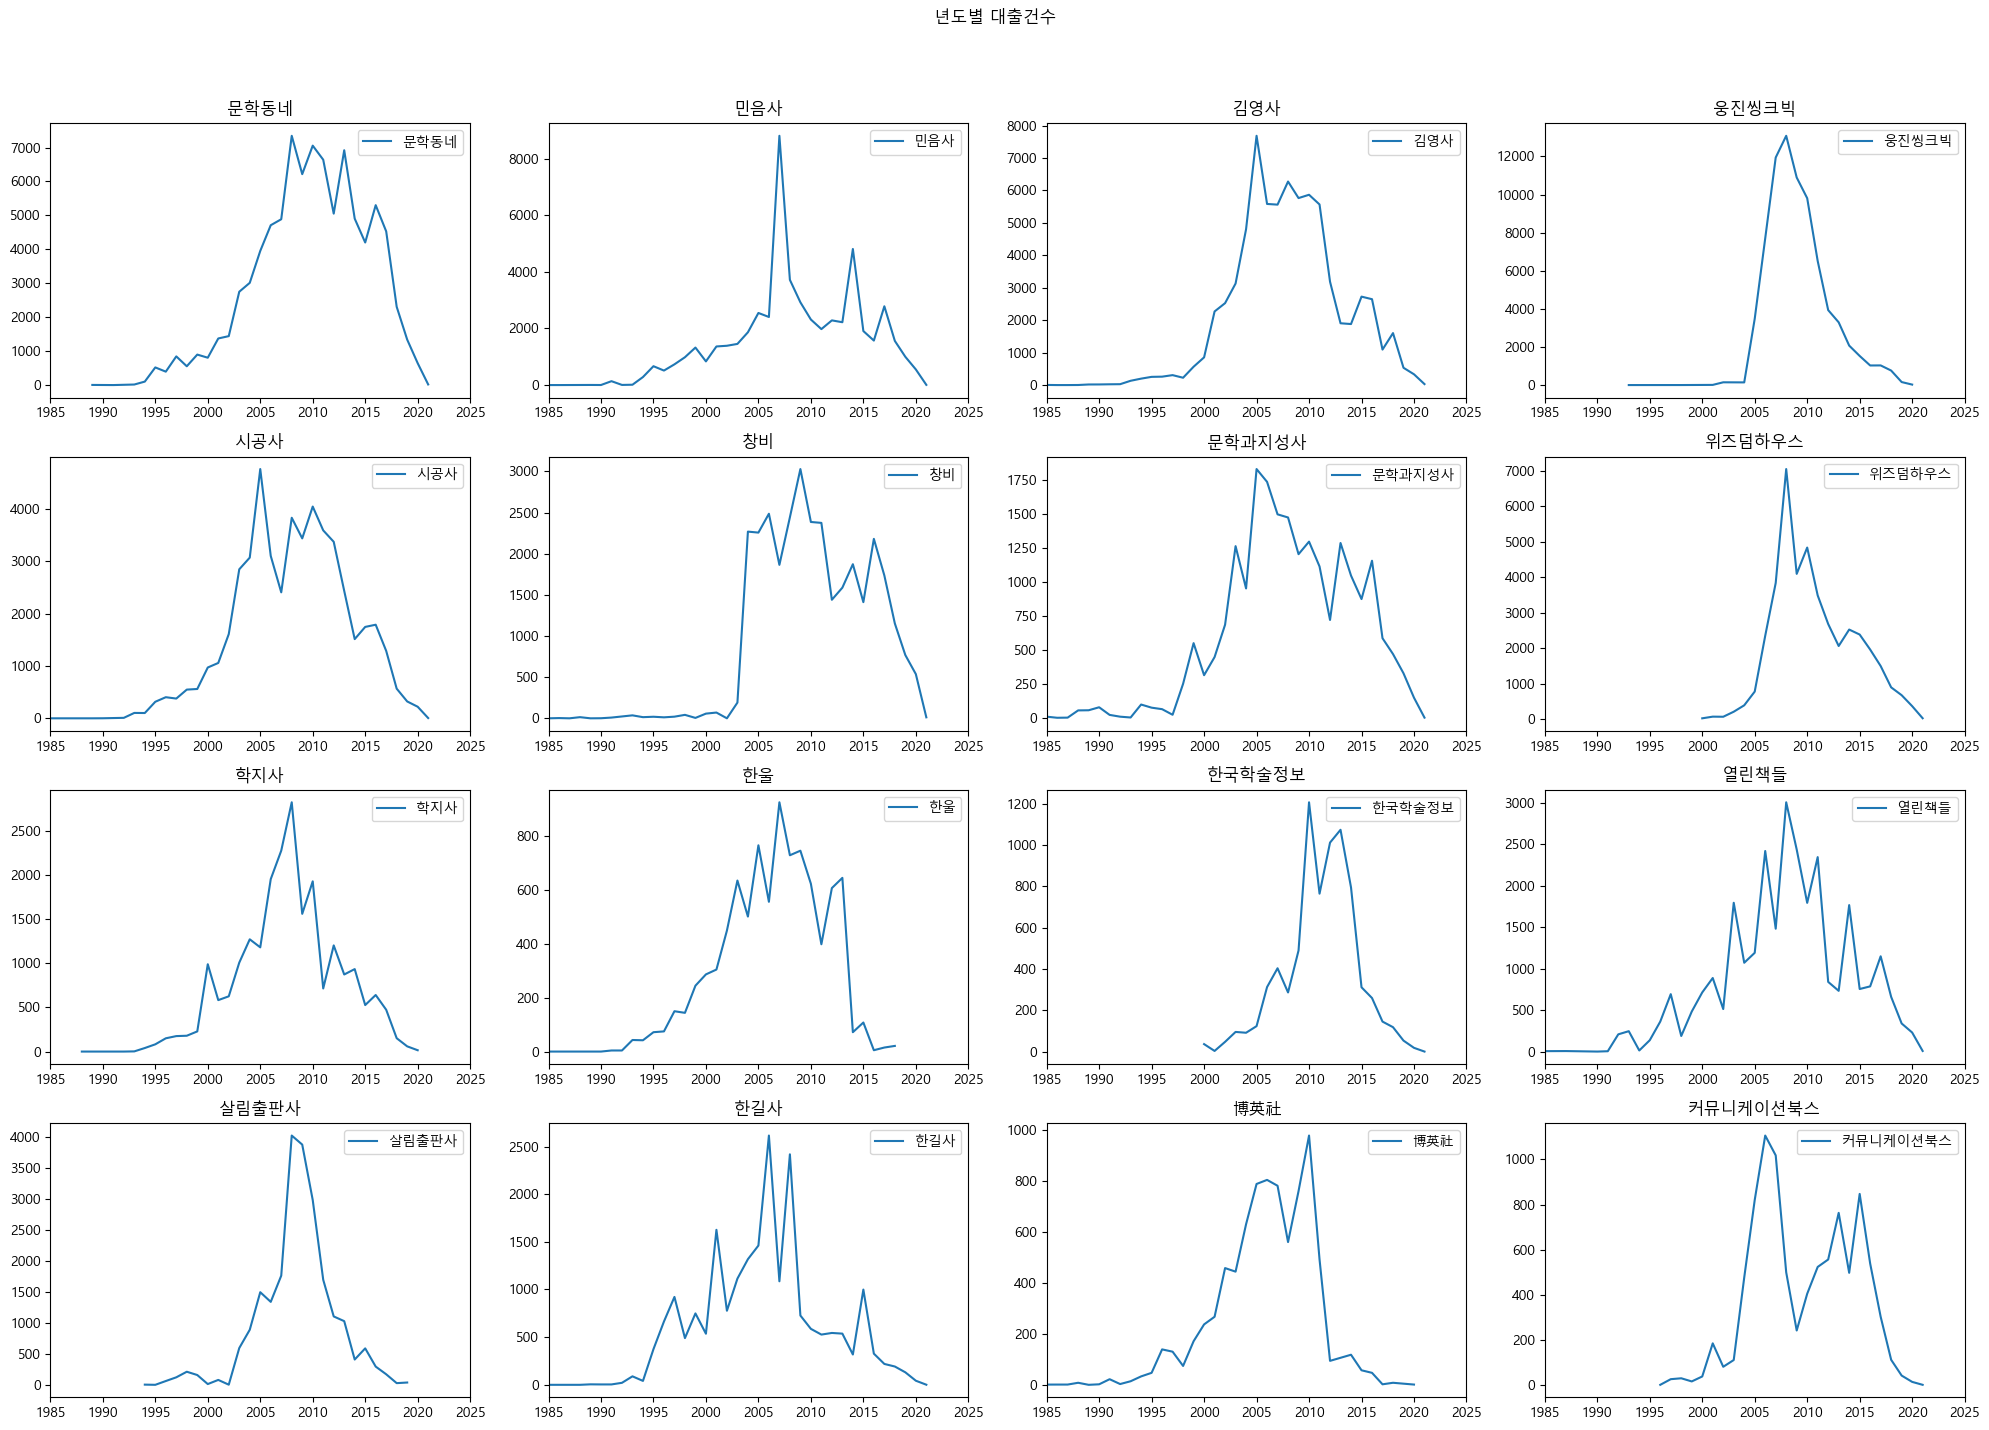

In [9]:
fig, ax = plt.subplots(4, 4, figsize=(16, 10))
for i, pub in enumerate(top30_pubs.index[:16]):
   # code
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 문제 2. 
-  대출건수가 10 이상인 도서들을 필터링하는 코드를 작성하세요. 

In [58]:
ns_book7.loc[ns_book7['대출건수'] >= 10, :].reset_index(drop=True).shape# code

(135535, 13)

## 문제 3
- isin 함수를 사용하여 저자가 '김동훈' 또는 '김태형'인 도서들을 필터링하세요.

In [61]:
ns_book7.loc[ns_book7['저자'].isin(['김동훈', '김태형']), :].reset_index(drop=True).shape# code

(1, 13)

## 문제 4. 
- 발행년도가 2020년 이상이고 대출건수가 5 이상인 도서들을 필터링하는 코드를 작성하세요.

In [12]:
# code

(1902, 13)

## 문제 5. 
- apply와 lambda를 사용하여 대출건수가 5 이상인 도서들의 도서명을 대문자로 변환하는 코드를 작성하세요.
    + 예: 해커스 토익:LISTENING ==> *** 해커스 토익:LISTENING ***
    + 새로운 컬럼명을 추가하세요. '도서명 + 5건이상'

In [13]:
# code

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자,도서명 + 5건이상
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN


## 문제 6. 
- 위 변형된 데이터셋에서 대출건수가 4와 5인 건수만 출력하세요. 

In [14]:
# code

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자,도서명 + 5건이상
0,134,그럼에도 나는 아파트를 사기로 했다,지은이: 박성혜,매경출판,2021,9791164841868,NaN,0,NaN,327.87,1,4,2021-03-12,NaN
1,1488,"빌 게이츠, 기후재앙을 피하는 법","빌 게이츠 지음, 김민주.이엽 옮김",김영사,2021,9788934991366,NaN,NaN,NaN,539.9,1,4,2021-02-23,NaN
2,1629,서울 아파트 황금 지도 (부동산 입지분석 고수 탑곰의 비밀 노트),탑곰,비에이블,2021,9791190931335,NaN,NaN,NaN,327.87,1,4,2021-02-16,NaN
3,1683,이어령 80년 생각 :'창조적 생각'의 탄생을 묻는 100시간의 인터뷰,김민희 지음,위즈덤하우스,2021,9791191308303,NaN,0,NaN,199.1,1,4,2021-02-10,NaN
4,1737,마음챙김의 시,류시화 엮음,수오서재,2020,9791190382267,NaN,0,NaN,808.1,1,4,2021-02-09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40779,370402,PIC 마이컴 기초부터 활용까지,권우현 저,컴파일테크놀로지,2003,9788987516042,NaN,9,NaN,566.37,1,5,2004-10-20,*** PIC 마이컴 기초부터 활용까지 ***
40780,370417,Maya,Danny Riddell;Andrew S. Britt [공]원저;황정하 옮김,비앤비,2002,9788955240733,NaN,9,NaN,566.76,1,5,2004-10-20,*** Maya ***
40781,370423,인간공학,Wickens,시그마프레스,2002,9788984450806,NaN,9,NaN,530.8,1,5,2004-10-20,*** 인간공학 ***
40782,370436,야윈 젖가슴,이청준 지음,마음산책,2001,9788989351139,NaN,0,NaN,814.6,2,5,2004-10-20,*** 야윈 젖가슴 ***


## 문제 7. 
- 저자 컬럼에서 류시화가 포함된 것만 추출하세요. 

In [16]:
# code

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자,도서명 + 5건이상
0,1737,마음챙김의 시,류시화 엮음,수오서재,2020,9791190382267,NaN,0,NaN,808.1,1,4,2021-02-09,NaN
1,4693,"마음챙김의 시(독치1, 움도1)",류시화 엮음,수오서재,2020,9791190382267,NaN,NaN,NaN,NaN,2,5,2020-11-13,"*** 마음챙김의 시(독치1, 움도1) ***"
2,7017,마음챙김의 시,류시화 (엮은이),수오서재,2020,9791190382267,NaN,NaN,NaN,808.1,1,7,2020-09-21,*** 마음챙김의 시 ***
3,12707,나는 나,"캐럴 피어슨 지음, 류시화 옮김",연금술사,2020,9791186686508,NaN,NaN,NaN,NaN,1,3,2020-06-12,NaN
4,12911,나는 나(스마트1),"캐럴 피어슨 지음, 류시화 옮김",연금술사,2020,9791186686508,NaN,NaN,NaN,NaN,1,4,2020-06-12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,372861,하늘 호수로 떠난 여행,류시화,열림원,2007,9788970631264,NaN,NaN,NaN,NaN,1,0,1970-01-01,NaN
98,376698,외눈박이 물고기의 사랑,류시화,열림원,1998,9788970631011,NaN,NaN,NaN,NaN,1,0,1970-01-01,NaN
99,376707,그대가 곁에 있어도 나는 그대가 그립다,류시화,푸른숲,1998,9788971841235,NaN,NaN,NaN,NaN,1,0,1970-01-01,NaN
100,380589,히말라야의 새,루디야드 키플링 지음;류시화 옮김,불일출판사,1992,9788985352000,NaN,NaN,NaN,843,1,0,1970-01-01,NaN


## 문제 8. 
-  저자 열에서 '류시화 엮음', '류시화 지음'과 같은 값을 '시화 류'로 변경하는 코드를 작성하세요.

In [ ]:
# code